# Projet : Consommation et production électrique en France

<img width=400 src="https://1.bp.blogspot.com/-_cw5mPFrxmc/XtuawSHRV0I/AAAAAAAAEWQ/52ff8l3-MKI0_ZdlJpwwyrH6tgh9diaOQCLcBGAsYHQ/s1600/uses-of-electricity-in-our-daily-life.jpg">
<p style="text-align: left"> Une  photo kitsch du réseau électrique </p>

## Présentation Du Dataset


<img src="../assets/image1.png" width="300"/>
<img src="../assets/image2.png" width="300"/>

**Informations issues du site (allez voir vous même également) :**

Ce jeu de données, rafraîchi une fois par jour, présente les données régionales de janvier 2013 à 2023. Elles sont issues de l'application éCO2mix. Elles sont élaborées à partir des comptages et complétées par des forfaits. 

Vous y trouverez au pas quart d'heure :

- Les prévisions de consommation établies la veille (J-1) et celles réactualisées le jour même (J).

Vous y trouverez au pas demi-heure :

- La consommation réalisée.
- La production selon les différentes filières composant le mix énergétique.
- La consommation des pompes dans les Stations de Transfert d'Energie par Pompage (STEP).
- Les échanges physiques aux frontières.
- Une estimation des émissions de carbone générées par la production d'électricité en France.
- Les échanges commerciaux aux frontières.
- Le découpage des filières par technologie du mix de production (débute en 2013).



<img src="../assets/image3.png" width="800"/>


## Objectifs et modalités de l'étude

**Modalités de l'étude :** 

- Vous travaillerez en groupe de 2 à 3.    
   
- Une présentation de votre travail sur une question sera effectuée en fin du projet. 
   
**Les objectifs de cette étude sont multiples :** 

- Apprendre à charger et manipuler des données réelles complexes avec Pandas. 

- Manipuler des séries temporelles. 

- Analyser des données pour répondre à une question exploratoire. 

- Présenter et vulgariser votre recherche exploratoire. 

**Notes sur les données RTE** :

- Elles proviennent du (génial) site éCO2mix et sont disponibles pour tout le monde (opendata) : https://www.rte-france.com/eco2mix 
- Données agrégées au niveau national : https://opendata.reseaux-energies.fr/explore/dataset/eco2mix-national-cons-def/information/?disjunctive.nature 
- Données agrégées au niveau régional : https://opendata.reseaux-energies.fr/explore/dataset/eco2mix-regional-cons-def/information/?disjunctive.libelle_region&disjunctive.nature

## Conseils & Remarques sur l'exploration des données

- La première étape de chargement, exploration et nettoyage de données peut être chronophage lorsqu'on traite des sets de données **réels**... Cela fait partie du travail de data scientist, il faut s'y faire :-)

> It takes less than five lines of code to train a basic machine learning algorithm. Exploratory data analysis and data preparation in comparison take longer and comprise of 80% of the data scientist’s time."  https://towardsdatascience.com/build-the-story-around-data-using-exploratory-data-analysis-and-pandas-c85bf3beff87

- Quand vous faîtes des recherches et que vous manipulez les données, n'oubliez pas de clarifier : **Quelle question/ hypothèse essayez-vous de résoudre/de prouver/ d'invalider ?**

- Votre notebook doit être **compréhensible**. Il doit vous permettre de partager vos recherches. Le lecteur final doit pouvoir le lire comme une histoire (collègue, vous dans un futur proche, etc.). Utilisez du **markdown** pour commenter votre code, discuter des résultats, insérer des images, ...

- **Table of Content** : mettez vous une table des matières et activez le **synchronize collapse state**. Ca vous permettre de vous y retrouver plus facilement. 

   
- Garantissez la **causalité** de votre notebook : l'ordre d'exécution des cellules dans un notebook est complexe. Ne faîtes pas l'erreur de ne pas vérifier que vous pouvez exécuter l'ensemble de vos cellules dans l'ordre. Sinon vous n'arriverez plus à exécuter votre notebook. 

- N'oubliez pas de reprendre les étapes d'exploration classiques des données vues précédemment (projets GapMinder, Arbres de Grenoble, ...) : afficher les informations sur vos dataframes, regardez les données, faites des sauvegardes intermédiaires (format .pkl par exemple), cherchez les outliers, les données manquantes, etc... 

- C'est une analyse exploratoire : **tatonnez**, **faîtes des graphiques**, ... 


- Lorsque c'est nécessaire (selon ce que vous cherchez) penser à normaliser/standardiser les données

- N'hésitez pas à **consulter l'aide de Pandas** ou à chercher la réponse à vos questions sur internet (quasiment tous les bugs que vous observerez on déjà fait l'objet d'un post sur **stackoverflow**)

**Ressources** :
-  Markdown : https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
-  Table of content : https://jupyterlab.readthedocs.io/en/stable/user/toc.html. 

# Chargement et préparation des données

&#x1F4A5; **To Do** 

- Charger les données nationales.
 
- Regarder les colonnes, sélectionner les données intéressantes.
 
- Les types inférés semblent-ils corrects ? Corriger si nécessaire (datetime, object, int, float, etc.)

- Choisir des noms de colonnes plus faciles à manipuler (espaces, accents...). <br/>Ressource : https://www.dataschool.io/pandas-dot-notation-vs-brackets/

- Choisir un index adéquat pour votre dataframe. Les lignes ont un comportement étrange, choisissez les lignes qui vous arrangent.

- Quelle période temporelle couvrent les données ?

- Faîtes un choix par rapport aux valeurs manquantes. Les garder sous forme de NaN ou une autre valeur ?

- Simplifiez le DataFrame : regardez vos colonnnes, cherchez à les comprendre et rassemblez celles que vous pouvez rassembler. 

- Sauvegardez vos données sous format **pkl** pour ne pas devoir refaire les pré-traitements à chaque fois que vous redémarrez le kernel.  


&#x1F4A5; **Ressources**

- La doc de pandas.

- Voici quelques fonctions en vrac dont vous aurez besoin (read_csv,  info,  drop, to_datetime, astype, nunique, set_index)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pathlib import Path

plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.facecolor"] = "#f1f3f9"

In [2]:
IMAGES_PATH = Path().resolve().parent / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
data_path = Path().resolve().parent / "data"

data_cons = pd.read_csv(data_path/"eco2mix-national-cons-def.csv", delimiter=";", parse_dates={'date':[2,3]})
data_cons_tr = pd.read_csv(data_path/"eco2mix-national-tr.csv", delimiter=";")

/tmp/ipykernel_6756/3110987333.py:3: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data_cons = pd.read_csv(data_path/"eco2mix-national-cons-def.csv", delimiter=";", parse_dates={'date':[2,3]})
/tmp/ipykernel_6756/3110987333.py:3: DtypeWarning: Columns (23,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data_cons = pd.read_csv(data_path/"eco2mix-national-cons-def.csv", delimiter=";", parse_dates={'date':[2,3]})
/tmp/ipykernel_6756/3110987333.py:4: DtypeWarning: Columns (13,14,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  data_cons_tr = pd.read_csv(data_path/"eco2mix-national-tr.csv", delimiter=";")


In [4]:
data_cons.head()

,date,Périmètre,Nature,Date et Heure,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),Gaz (MW),...,Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
0,2015-12-16 03:00:00,France,Données définitives,2015-12-16T03:00:00+01:00,54421.0,53500,53500,326.0,1280.0,2541.0,...,3.0,2031,462.0,44.0,2146.0,646.0,0.0,593.0,225.0,222.0
1,2015-12-16 03:15:00,France,Données définitives,2015-12-16T03:15:00+01:00,NaN,52950,53050,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-12-16 05:00:00,France,Données définitives,2015-12-16T05:00:00+01:00,52632.0,52300,52200,328.0,1274.0,2714.0,...,3.0,2023,643.0,44.0,2046.0,468.0,0.0,601.0,230.0,222.0
3,2015-12-16 05:15:00,France,Données définitives,2015-12-16T05:15:00+01:00,NaN,53300,53150,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-12-16 07:00:00,France,Données définitives,2015-12-16T07:00:00+01:00,63733.0,64000,63300,348.0,2263.0,5308.0,...,3.0,2103,3167.0,35.0,2716.0,1011.0,0.0,537.0,238.0,222.0


In [5]:
data = data_cons.copy()

rename_dict = {
    'Périmètre': 'perimetre', 'Nature': 'nature', 'Date': 'date',
    'Heure': 'heure', 'Date et Heure': 'date_heure',
    'Consommation (MW)': 'consommation', 'Prévision J-1 (MW)': 'prevision_j1',
    'Prévision J (MW)': 'prevision_j', 'Fioul (MW)': 'fioul', 'Charbon (MW)': 'charbon',
    'Gaz (MW)': 'gaz', 'Nucléaire (MW)': 'nucleaire', 'Eolien (MW)': 'eolien',
    'Solaire (MW)': 'solaire', 'Hydraulique (MW)': 'hydraulique', 'Pompage (MW)': 'pompage',
    'Bioénergies (MW)': 'bioenergies', 'Ech. physiques (MW)': 'ech_physiques',
    'Taux de CO2 (g/kWh)': 'taux_co2', 'Ech. comm. Angleterre (MW)': 'ech_comm_angleterre',
    'Ech. comm. Espagne (MW)': 'ech_comm_espagne', 'Ech. comm. Italie (MW)': 'ech_comm_italie',
    'Ech. comm. Suisse (MW)': 'ech_comm_suisse',
    'Ech. comm. Allemagne-Belgique (MW)': 'ech_comm_allemagne_belgique',
    'Fioul - TAC (MW)': 'fioul_tac', 'Fioul - Cogénération (MW)': 'fioul_cogen',
    'Fioul - Autres (MW)': 'fioul_autres', 'Gaz - TAC (MW)': 'gaz_tac',
    'Gaz - Cogénération (MW)': 'gaz_cogen', 'Gaz - CCG (MW)': 'gaz_ccg',
    'Gaz - Autres (MW)': 'gaz_autres',
    'Hydraulique - Fil de l\'eau + éclusée (MW)': 'hydraulique_fil_eau_eclusee',
    'Hydraulique - Lacs (MW)': 'hydraulique_lacs',
    'Hydraulique - STEP turbinage (MW)': 'hydraulique_step_turbinage',
    'Bioénergies - Déchets (MW)': 'bioenergies_dechets',
    'Bioénergies - Biomasse (MW)': 'bioenergies_biomasse',
    'Bioénergies - Biogaz (MW)': 'bioenergies_biogaz'
}

data.rename(rename_dict, axis=1, inplace=True)

In [6]:
data["date"]

0        2015-12-16 03:00:00
1        2015-12-16 03:15:00
2        2015-12-16 05:00:00
3        2015-12-16 05:15:00
4        2015-12-16 07:00:00
                 ...        
378811   2020-12-31 12:30:00
378812   2020-12-31 13:30:00
378813   2020-12-31 15:45:00
378814   2020-12-31 16:00:00
378815   2020-12-31 19:00:00
Name: date, Length: 378816, dtype: datetime64[ns]

In [7]:
(data["date"].dt.date.min(), data["date"].dt.date.max())

(datetime.date(2012, 1, 1), datetime.date(2023, 1, 31))

The Dataset covers the period between January first of 2012 to January 31 of 2023

In [8]:
#data[["ech_comm_allemagne_belgique", "gaz_cogen"]] = data[["ech_comm_allemagne_belgique", "gaz_cogen"]].replace('ND', np.NaN)

#data[["ech_comm_allemagne_belgique", "gaz_cogen"]] = data[["ech_comm_allemagne_belgique", "gaz_cogen"]].astype("float64")

#data["date"] = pd.to_datetime(data["date"], format="%Y-%m-%d") # put column 'date' in datetime type
#data["heure"] = pd.to_datetime(data["heure"], format="%H:%M")  # put the column 'heure' in datetime type
#data['minute'] = data['heure'].dt.minute                       # create the column 'minute' by getting the minutes from 'heure'
#data['heure'] = [x.strftime("%H:%M") for x in data.heure]      # format the 'heure' column to be in HH:MM format
#data = data[data['minute'].isin([0, 30])]                      # retrieve only the data in thirty minute interval

#columns_to_drop = ["perimetre", "date_heure", "minute"]

#data.drop(columns_to_drop, axis=1, inplace=True)
#data.reset_index(inplace=True, drop=True)
#data.set_index("date", verify_integrity=True, inplace=True)

#data.info(verbose=True)

In [9]:
data[["ech_comm_allemagne_belgique", "gaz_cogen"]] = data[["ech_comm_allemagne_belgique", "gaz_cogen"]].replace('ND', np.NaN)

data[["ech_comm_allemagne_belgique", "gaz_cogen"]] = data[["ech_comm_allemagne_belgique", "gaz_cogen"]].astype("float64")

#data["date"] = pd.to_datetime(data["date"], format="%Y-%m-%d") # put column 'date' in datetime type
#data["heure"] = pd.to_datetime(data["heure"], format="%H:%M")  # put the column 'heure' in datetime type
data["minute"] = data["date"].dt.minute                         # create the column 'minute' by getting the minutes from 'heure'
#data['heure'] = [x.strftime("%H:%M") for x in data.heure]       # format the 'heure' column to be in HH:MM format
data = data[data['minute'].isin([0, 30])]                       # retrieve only the data in thirty minute interval

columns_to_drop = ["perimetre", "date_heure", "minute"]

data.drop(columns_to_drop, axis=1, inplace=True)
data.reset_index(inplace=True, drop=True)
data.set_index("date", verify_integrity=True, inplace=True)

data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 189408 entries, 2015-12-16 03:00:00 to 2020-12-31 19:00:00
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   nature                       189408 non-null  object 
 1   consommation                 189407 non-null  float64
 2   prevision_j1                 189408 non-null  int64  
 3   prevision_j                  189408 non-null  int64  
 4   fioul                        189407 non-null  float64
 5   charbon                      189407 non-null  float64
 6   gaz                          189407 non-null  float64
 7   nucleaire                    189407 non-null  float64
 8   eolien                       189407 non-null  float64
 9   solaire                      189407 non-null  float64
 10  hydraulique                  189407 non-null  float64
 11  pompage                      189407 non-null  float64
 12  bioenergies             

In [10]:
#(data["date"].dt.date.min(), data["date"].dt.date.max())

The Dataset covers the period between January first of 2012 to January 31 of 2023

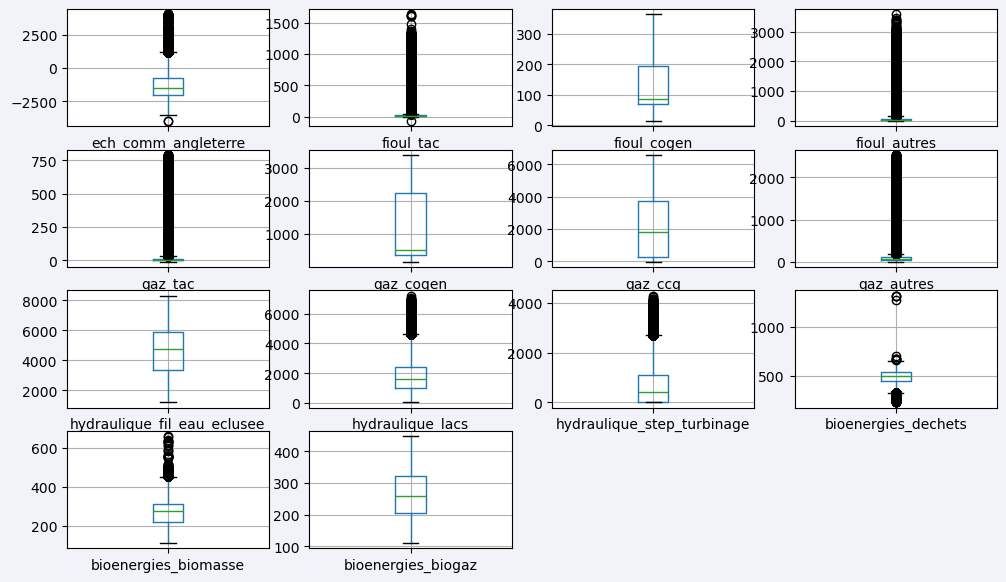

In [10]:
fig = plt.figure()

ax1 = fig.add_subplot(4, 4, 1)
ax2 = fig.add_subplot(4, 4, 2)
ax3 = fig.add_subplot(4, 4, 3)
ax4 = fig.add_subplot(4, 4, 4)
ax5 = fig.add_subplot(4, 4, 5)
ax6 = fig.add_subplot(4, 4, 6)
ax7 = fig.add_subplot(4, 4, 7)
ax8 = fig.add_subplot(4, 4, 8)
ax9 = fig.add_subplot(4, 4, 9)
ax10 = fig.add_subplot(4, 4, 10)
ax11 = fig.add_subplot(4, 4, 11)
ax12 = fig.add_subplot(4, 4, 12)
ax13 = fig.add_subplot(4, 4, 13)
ax14 = fig.add_subplot(4, 4, 14)

data.boxplot(column=["ech_comm_angleterre"], ax=ax1)
data.boxplot(column=["fioul_tac"], ax=ax2)
data.boxplot(column=["fioul_cogen"], ax=ax3)
data.boxplot(column=["fioul_autres"], ax=ax4)
data.boxplot(column=["gaz_tac"], ax=ax5)
data.boxplot(column=["gaz_cogen"], ax=ax6)
data.boxplot(column=["gaz_ccg"], ax=ax7)
data.boxplot(column=["gaz_autres"], ax=ax8)
data.boxplot(column=["hydraulique_fil_eau_eclusee"], ax=ax9)
data.boxplot(column=["hydraulique_lacs"], ax=ax10)
data.boxplot(column=["hydraulique_step_turbinage"], ax=ax11)
data.boxplot(column=["bioenergies_dechets"], ax=ax12)
data.boxplot(column=["bioenergies_biomasse"], ax=ax13)
data.boxplot(column=["bioenergies_biogaz"], ax=ax14)

plt.show()

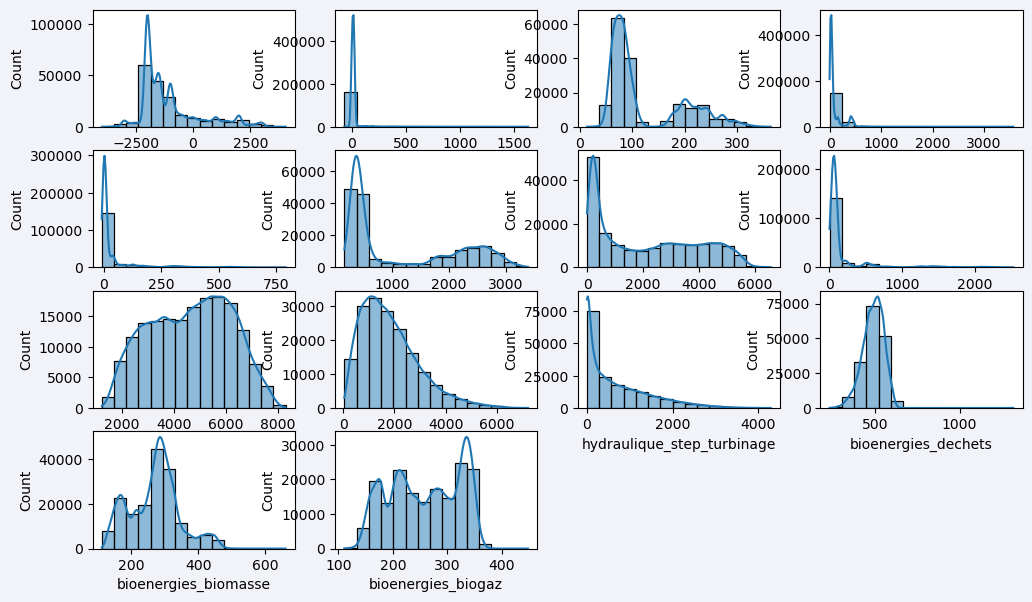

In [11]:
fig = plt.figure()

ax1 = fig.add_subplot(4, 4, 1)
ax2 = fig.add_subplot(4, 4, 2)
ax3 = fig.add_subplot(4, 4, 3)
ax4 = fig.add_subplot(4, 4, 4)
ax5 = fig.add_subplot(4, 4, 5)
ax6 = fig.add_subplot(4, 4, 6)
ax7 = fig.add_subplot(4, 4, 7)
ax8 = fig.add_subplot(4, 4, 8)
ax9 = fig.add_subplot(4, 4, 9)
ax10 = fig.add_subplot(4, 4, 10)
ax11 = fig.add_subplot(4, 4, 11)
ax12 = fig.add_subplot(4, 4, 12)
ax13 = fig.add_subplot(4, 4, 13)
ax14 = fig.add_subplot(4, 4, 14)

sns.histplot(data=data, x="ech_comm_angleterre", bins=15, kde=True, ax=ax1)
sns.histplot(data=data, x="fioul_tac", bins=15, kde=True, ax=ax2)
sns.histplot(data=data, x="fioul_cogen", bins=15, kde=True, ax=ax3)
sns.histplot(data=data, x="fioul_autres", bins=15, kde=True, ax=ax4)
sns.histplot(data=data, x="gaz_tac", bins=15, kde=True, ax=ax5)
sns.histplot(data=data, x="gaz_cogen", bins=15, kde=True, ax=ax6)
sns.histplot(data=data, x="gaz_ccg", bins=15, kde=True, ax=ax7)
sns.histplot(data=data, x="gaz_autres", bins=15, kde=True, ax=ax8)
sns.histplot(data=data, x="hydraulique_fil_eau_eclusee", bins=15, kde=True, ax=ax9)
sns.histplot(data=data, x="hydraulique_lacs", bins=15, kde=True, ax=ax10)
sns.histplot(data=data, x="hydraulique_step_turbinage", bins=15, kde=True, ax=ax11)
sns.histplot(data=data, x="bioenergies_dechets", bins=15, kde=True, ax=ax12)
sns.histplot(data=data, x="bioenergies_biomasse", bins=15, kde=True, ax=ax13)
sns.histplot(data=data, x="bioenergies_biogaz", bins=15, kde=True, ax=ax14)

plt.show()

In [11]:
fill_nan_cols = ["ech_comm_angleterre", "fioul_tac", "fioul_cogen", "fioul_autres",
                 "gaz_tac", "gaz_cogen", "gaz_ccg", "gaz_autres", 
                 "hydraulique_fil_eau_eclusee", "hydraulique_lacs",
                 "hydraulique_step_turbinage", "bioenergies_dechets",
                 "bioenergies_biomasse", "bioenergies_biogaz"]

for col in fill_nan_cols:
    data[col] = data[col].fillna(data[col].median())

for col, coltype in data.dtypes.items():
    if coltype != "object" and coltype != "datetime64[ns]":
        data[col] = data[col].fillna(data[col].mean())

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 189408 entries, 2015-12-16 03:00:00 to 2020-12-31 19:00:00
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   nature                       189408 non-null  object 
 1   consommation                 189408 non-null  float64
 2   prevision_j1                 189408 non-null  int64  
 3   prevision_j                  189408 non-null  int64  
 4   fioul                        189408 non-null  float64
 5   charbon                      189408 non-null  float64
 6   gaz                          189408 non-null  float64
 7   nucleaire                    189408 non-null  float64
 8   eolien                       189408 non-null  float64
 9   solaire                      189408 non-null  float64
 10  hydraulique                  189408 non-null  float64
 11  pompage                      189408 non-null  float64
 12  bioenergies             

In [14]:
data.head()

,nature,consommation,prevision_j1,prevision_j,fioul,charbon,gaz,nucleaire,eolien,solaire,...,gaz_tac,gaz_cogen,gaz_ccg,gaz_autres,hydraulique_fil_eau_eclusee,hydraulique_lacs,hydraulique_step_turbinage,bioenergies_dechets,bioenergies_biomasse,bioenergies_biogaz
date,,,,,,,,,,,,,,,,,,,,,
2015-12-16 03:00:00,Données définitives,54421.0,53500,53500,326.0,1280.0,2541.0,55263.0,4010.0,-1.0,...,3.0,2031.0,462.0,44.0,2146.0,646.0,0.0,593.0,225.0,222.0
2015-12-16 05:00:00,Données définitives,52632.0,52300,52200,328.0,1274.0,2714.0,56200.0,4138.0,-1.0,...,3.0,2023.0,643.0,44.0,2046.0,468.0,0.0,601.0,230.0,222.0
2015-12-16 07:00:00,Données définitives,63733.0,64000,63300,348.0,2263.0,5308.0,58001.0,4024.0,-1.0,...,3.0,2103.0,3167.0,35.0,2716.0,1011.0,0.0,537.0,238.0,222.0
2015-12-16 11:00:00,Données définitives,67650.0,67000,66800,351.0,2057.0,6687.0,58324.0,3415.0,1215.0,...,3.0,2075.0,4574.0,35.0,3440.0,1678.0,1224.0,503.0,239.0,218.0
2015-12-16 14:00:00,Données définitives,65899.0,64800,65000,346.0,2156.0,6790.0,58564.0,3345.0,1277.0,...,2.0,2212.0,4541.0,35.0,3134.0,1146.0,759.0,529.0,242.0,222.0


#### **Note**:

Some columns can be summed together, like for example the "ech_comm_x" where x are countries like angleterre, espagne etc
Or the "fioul_x", "gaz_y", "bioenergies_z" etc: they can be summed together if we don't mind in losing specific granular information and only care about the absolute total quantity.

In [15]:
data.to_pickle(data_path/"eco2mix-national-cons-def-treated.pkl")

# Exploration du dataset National

In [25]:
data_cons_df = pd.read_pickle(data_path/"eco2mix-national-cons-def-treated.pkl")
data_cons_df.head()

,nature,consommation,prevision_j1,prevision_j,fioul,charbon,gaz,nucleaire,eolien,solaire,...,gaz_tac,gaz_cogen,gaz_ccg,gaz_autres,hydraulique_fil_eau_eclusee,hydraulique_lacs,hydraulique_step_turbinage,bioenergies_dechets,bioenergies_biomasse,bioenergies_biogaz
date,,,,,,,,,,,,,,,,,,,,,
2015-12-16 03:00:00,Données définitives,54421.0,53500,53500,326.0,1280.0,2541.0,55263.0,4010.0,-1.0,...,3.0,2031.0,462.0,44.0,2146.0,646.0,0.0,593.0,225.0,222.0
2015-12-16 05:00:00,Données définitives,52632.0,52300,52200,328.0,1274.0,2714.0,56200.0,4138.0,-1.0,...,3.0,2023.0,643.0,44.0,2046.0,468.0,0.0,601.0,230.0,222.0
2015-12-16 07:00:00,Données définitives,63733.0,64000,63300,348.0,2263.0,5308.0,58001.0,4024.0,-1.0,...,3.0,2103.0,3167.0,35.0,2716.0,1011.0,0.0,537.0,238.0,222.0
2015-12-16 11:00:00,Données définitives,67650.0,67000,66800,351.0,2057.0,6687.0,58324.0,3415.0,1215.0,...,3.0,2075.0,4574.0,35.0,3440.0,1678.0,1224.0,503.0,239.0,218.0
2015-12-16 14:00:00,Données définitives,65899.0,64800,65000,346.0,2156.0,6790.0,58564.0,3345.0,1277.0,...,2.0,2212.0,4541.0,35.0,3134.0,1146.0,759.0,529.0,242.0,222.0


## Réflexion

Avant de vous lancer dans la mise en pratique, prenez quelques minutes (max 30 minutes) pour observer les données et explorer les premières statistiques descriptives : 
- Quelles questions vous posez-vous sur les données ? 

- Qu'avez-vous envie d'explorer ? Soyez créatifs !

## Mise en application

&#x1F4A5; **To Do**
    
L'objectif ici est de **comprendre les données** présentes dans le dataset national que vous avez créé. 

---
- **Affichez vos données pour mieux les comprendre** : choisir plusieurs durées pour afficher vos données : semaine, mois, année, durée totale, faîtes des comparaisons... (pensez à utiliser des choses comme rolling mean) 
    - Tracer l'évolution de la consommation
    - Tracer l'évolution de la production par source d'énergie et au niveau global,
    - Tracer l'évolution de émissions de CO2.

---

- **Mix énergétique** :
    - Trouvez plusieurs manières de visualiser les données de production : plot, pie chart, rolling mean...
    - Quelle est la source de production largement majoritaire ?
    - Quelle est l'évolution de la part des énergies fossiles dans le mix énergétique ?  
    - Quelle est l'évolution de la part des énergies renouvelables dans le mix énergétique français ?
    - Quelle est la part de chaque filière de production d'énergies renouvelables (hydraulique, solaire, ...) 

---

- **Autonomie électrique** :
    - comparer la production totale française à la consommation totale. Quelle est le taux d'indépendance énergétique de la france au cours du temps ? C'est à dire la proportion du temps où la France est autonome en énergie. Faire le caclul sur la durée totale mais aussi par année et par mois.
    - Trouver les outliers    
---

- **Equilibre du réseau électrique** : Vérifier que la production, la consommation et les échanges commerciaux s'équilibrent en permanence. <br/> Ressource pour comprendre : https://fr.wikipedia.org/wiki/Ajustement_offre-demande_d%27%C3%A9lectricit%C3%A9 

---

- **Analyser la tendance des données** :
    - Analyser la saisonnalité des productions, comparer les mois de l'année entre eux. Quand consomme-t-on le plus ?
    - Printemps vs Eté vs Automne vs Hiver ?
    - Quelle est la tendance générale de l'évolution à long terme de la production d'énergie solaire ?
    - Quelle est la tendance générale de l'évolution à long terme de l'émission de CO2 ?

---

- **Impact des sources primaires de production sur le Taux de CO2** :
    - Corrélez les données entre elles et déduisez-en l'impact positif ou négatif de chacune des sources de production sur l'estimation du taux de CO2 émis.
    <br/> **Pandas** : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
    <br/> **Théorie** : https://data36.com/correlation-definition-calculation-corr-pandas/

---
- [Bonus] **Analyser les périodicités des données** :
    - Réaliser une analyse de Fourier de vos séries temporelles
      <br/> **Théorie et pratique** : https://realpython.com/python-scipy-fft/

---

- **Géopolitique** :
    - Visualisez et analysez l'impact du COVID et de la guerre en Ukraine sur le réseau électrique ?

---

&#x1F4A5; **Aide**
- Ressource utile pour vous aider à analyser les données : https://www.statistiques.developpement-durable.gouv.fr/edition-numerique/bilan-energetique-2020/
- `pandas.DataFrame.rolling` vous aidera à afficher vos données et en comprendre les tendances. 
- Les `pandas.Grouper` vous aideront pour grouper les données temporelles.
- la méthode `.plot()` fonctionne parfaitement avec un datetime en index
- Corrélation : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
- attention aux `NaN` pour les plots.

---

---

---

---

### Part 1

- **Affichez vos données pour mieux les comprendre** : choisir plusieurs durées pour afficher vos données : semaine, mois, année, durée totale, faîtes des comparaisons... (pensez à utiliser des choses comme rolling mean) 
    - Tracer l'évolution de la consommation
    - Tracer l'évolution de la production par source d'énergie et au niveau global,
    - Tracer l'évolution de émissions de CO2.

#### Consommation

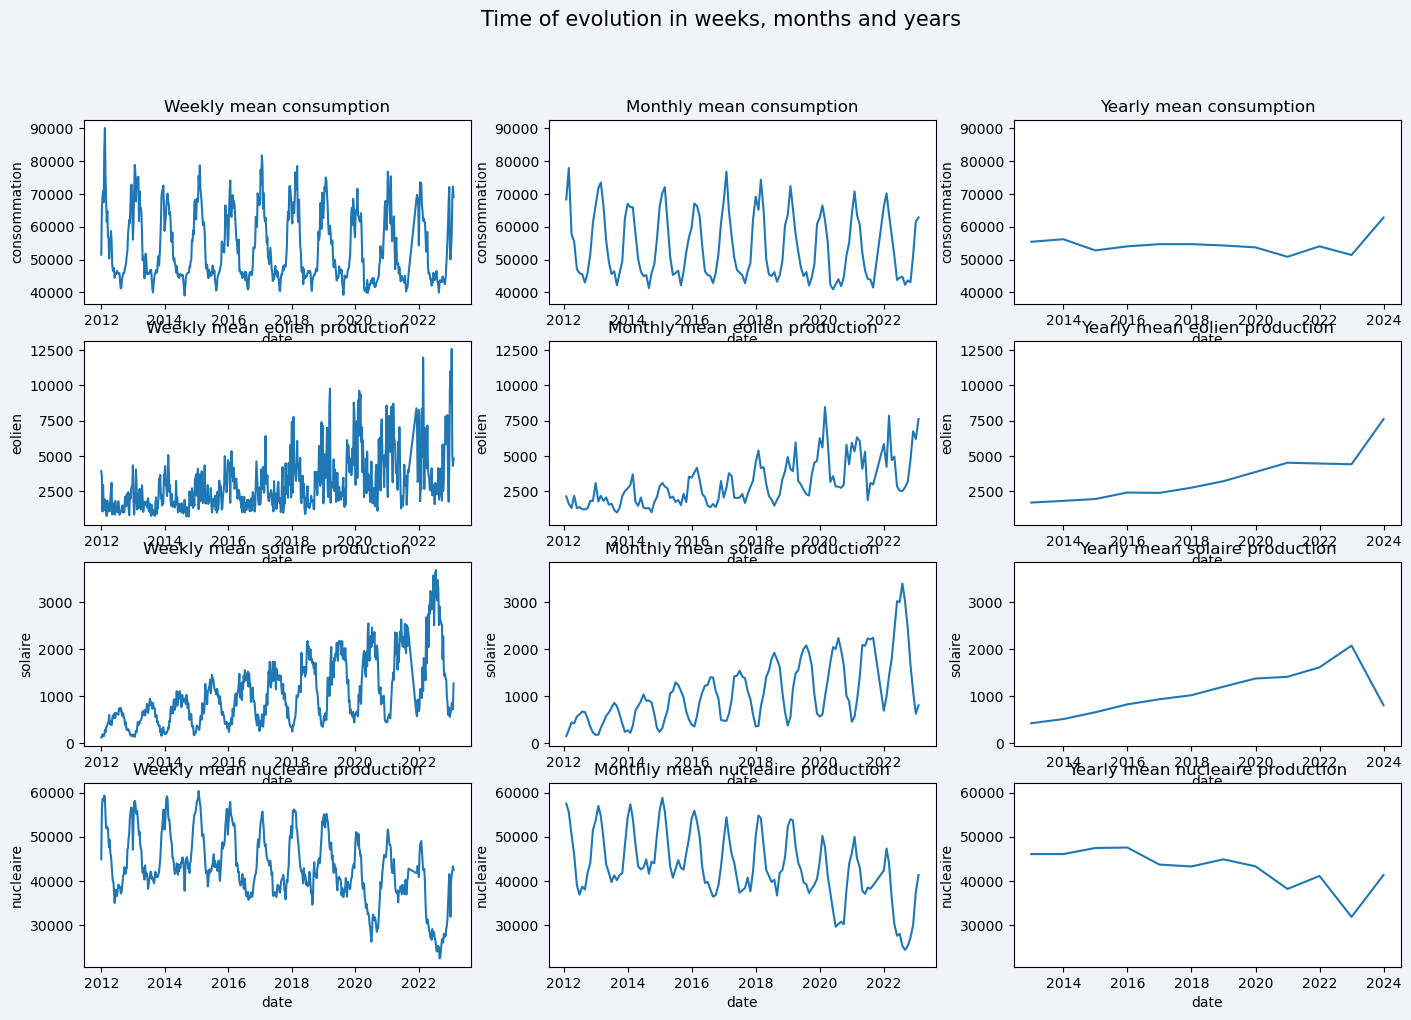

In [38]:
fig = plt.figure(figsize=(17,11))

ax1 = fig.add_subplot(4, 3, 1)
ax2 = fig.add_subplot(4, 3, 2, sharey = ax1)
ax3 = fig.add_subplot(4, 3, 3, sharey = ax1)

ax4 = fig.add_subplot(4, 3, 4)
ax5 = fig.add_subplot(4, 3, 5, sharey = ax4)
ax6 = fig.add_subplot(4, 3, 6, sharey = ax4)

ax7 = fig.add_subplot(4, 3, 7)
ax8 = fig.add_subplot(4, 3, 8, sharey = ax7)
ax9 = fig.add_subplot(4, 3, 9, sharey = ax7)

ax10 = fig.add_subplot(4, 3, 10)
ax11 = fig.add_subplot(4, 3, 11, sharey = ax10)
ax12 = fig.add_subplot(4, 3, 12, sharey = ax11)

sns.lineplot(data=data_cons_df.resample('1W').consommation.mean(),ax=ax1)
sns.lineplot(data=data_cons_df.resample('1ME').consommation.mean(),ax=ax2)
sns.lineplot(data=data_cons_df.resample('1YE').consommation.mean(),ax=ax3)

sns.lineplot(data=data_cons_df.resample('1W').eolien.mean(),ax=ax4)
sns.lineplot(data=data_cons_df.resample('1ME').eolien.mean(),ax=ax5)
sns.lineplot(data=data_cons_df.resample('1YE').eolien.mean(),ax=ax6)

sns.lineplot(data=data_cons_df.resample('1W').solaire.mean(),ax=ax7)
sns.lineplot(data=data_cons_df.resample('1ME').solaire.mean(),ax=ax8)
sns.lineplot(data=data_cons_df.resample('1YE').solaire.mean(),ax=ax9)

sns.lineplot(data=data_cons_df.resample('1W').nucleaire.mean(),ax=ax10)
sns.lineplot(data=data_cons_df.resample('1ME').nucleaire.mean(),ax=ax11)
sns.lineplot(data=data_cons_df.resample('1YE').nucleaire.mean(),ax=ax12)

ax1.set_title("Weekly mean consumption")
ax2.set_title("Monthly mean consumption")
ax3.set_title("Yearly mean consumption")
ax4.set_title("Weekly mean eolien production")
ax5.set_title("Monthly mean eolien production")
ax6.set_title("Yearly mean eolien production")
ax7.set_title("Weekly mean solaire production")
ax8.set_title("Monthly mean solaire production")
ax9.set_title("Yearly mean solaire production")
ax10.set_title("Weekly mean nucleaire production")
ax11.set_title("Monthly mean nucleaire production")
ax12.set_title("Yearly mean nucleaire production")

fig.suptitle("Time of evolution in weeks, months and years", fontsize=15)

plt.show()

#### CO2 emission

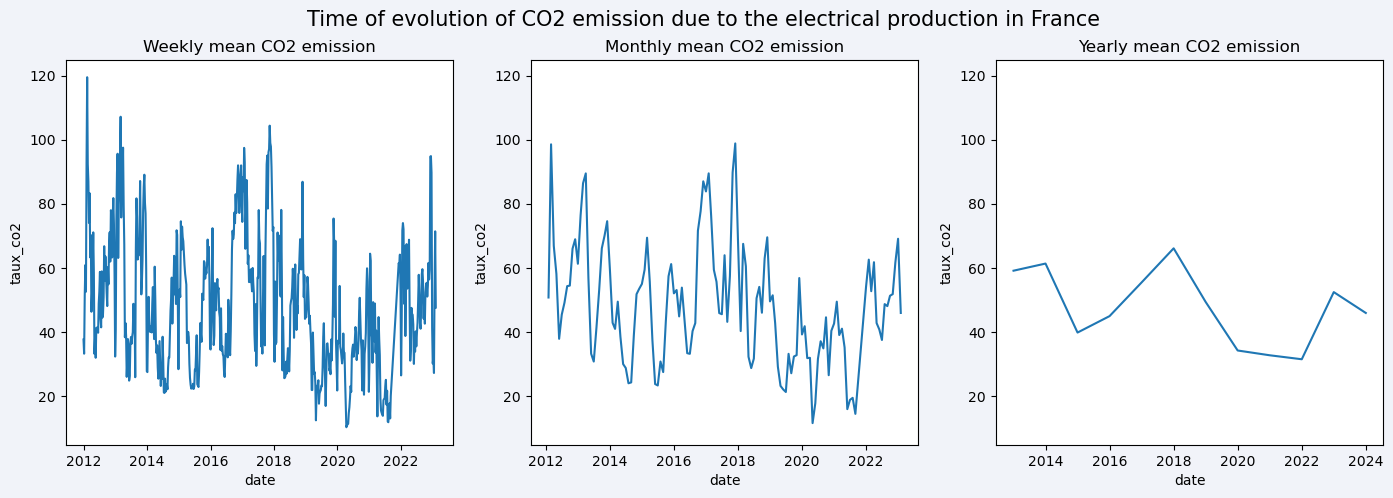

In [45]:
fig = plt.figure(figsize=(17,5))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2, sharey = ax1)
ax3 = fig.add_subplot(1, 3, 3, sharey = ax1)

sns.lineplot(data=data_cons_df.resample('1W').taux_co2.mean(),ax=ax1)
sns.lineplot(data=data_cons_df.resample('1ME').taux_co2.mean(),ax=ax2)
sns.lineplot(data=data_cons_df.resample('1YE').taux_co2.mean(),ax=ax3)

ax1.set_title("Weekly mean CO2 emission")
ax2.set_title("Monthly mean CO2 emission")
ax3.set_title("Yearly mean CO2 emission")

fig.suptitle("Time of evolution of CO2 emission due to the electrical production in France", fontsize=15)

plt.show()

### Part 2

- **Mix énergétique** :
    - Trouvez plusieurs manières de visualiser les données de production : plot, pie chart, rolling mean...
    - Quelle est la source de production largement majoritaire ?
    - Quelle est l'évolution de la part des énergies fossiles dans le mix énergétique ?  
    - Quelle est l'évolution de la part des énergies renouvelables dans le mix énergétique français ?
    - Quelle est la part de chaque filière de production d'énergies renouvelables (hydraulique, solaire, ...)

In [54]:
data_cons_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 189408 entries, 2015-12-16 03:00:00 to 2020-12-31 19:00:00
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   nature                       189408 non-null  object 
 1   consommation                 189408 non-null  float64
 2   prevision_j1                 189408 non-null  int64  
 3   prevision_j                  189408 non-null  int64  
 4   fioul                        189408 non-null  float64
 5   charbon                      189408 non-null  float64
 6   gaz                          189408 non-null  float64
 7   nucleaire                    189408 non-null  float64
 8   eolien                       189408 non-null  float64
 9   solaire                      189408 non-null  float64
 10  hydraulique                  189408 non-null  float64
 11  pompage                      189408 non-null  float64
 12  bioenergies             

/tmp/ipykernel_6756/824440102.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_2018_consommation_per_source = pd.concat([df_2018_consommation_per_source, pd.DataFrame(di, index=[0])], ignore_index=True)


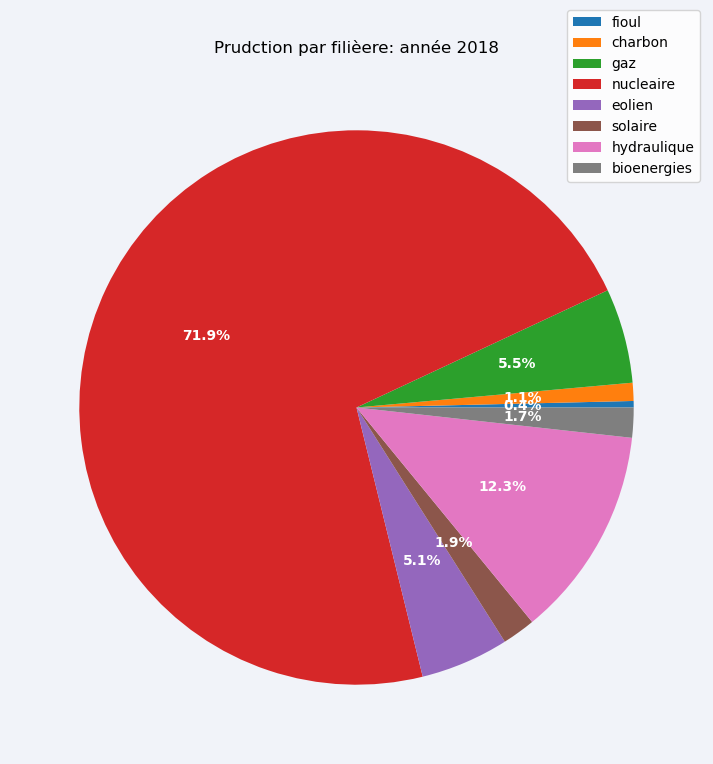

In [58]:
# Choose a year (ex: 2018) and plot the share that each of the different energy sources has in the total energy production:

#ToDo
df_2018 = data_cons_df.loc['2018']

consommation_total_2018 = df_2018["consommation"].sum()

df_2018_consommation_per_source = pd.DataFrame(columns=["source", "percent"])

source_list = ["fioul", "charbon", "gaz", "nucleaire", "eolien",
                "solaire", "hydraulique", "pompage", "bioenergies"]

for source in source_list:

    x = (df_2018[source].sum() / consommation_total_2018) * 100
    di = {"source": source, "percent": x}
    df_2018_consommation_per_source = pd.concat([df_2018_consommation_per_source, pd.DataFrame(di, index=[0])], ignore_index=True)
    df_filtered = df_2018_consommation_per_source[df_2018_consommation_per_source["percent"] >= 0].dropna()

df_filtered["percent"] = (df_filtered['percent']/df_filtered['percent'].sum()) * 100

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(df_filtered['percent'],
                                  autopct=lambda pct: func(pct, df_filtered['percent']),
                                  textprops=dict(color="w"))
ax.legend(wedges, df_filtered['source'],
          loc="center",
          bbox_to_anchor=(0.9, 0.3, 0, 1.3))
plt.setp(autotexts, size=10, weight="bold")
ax.set_title("Prudction par filièere: année 2018")
plt.show()

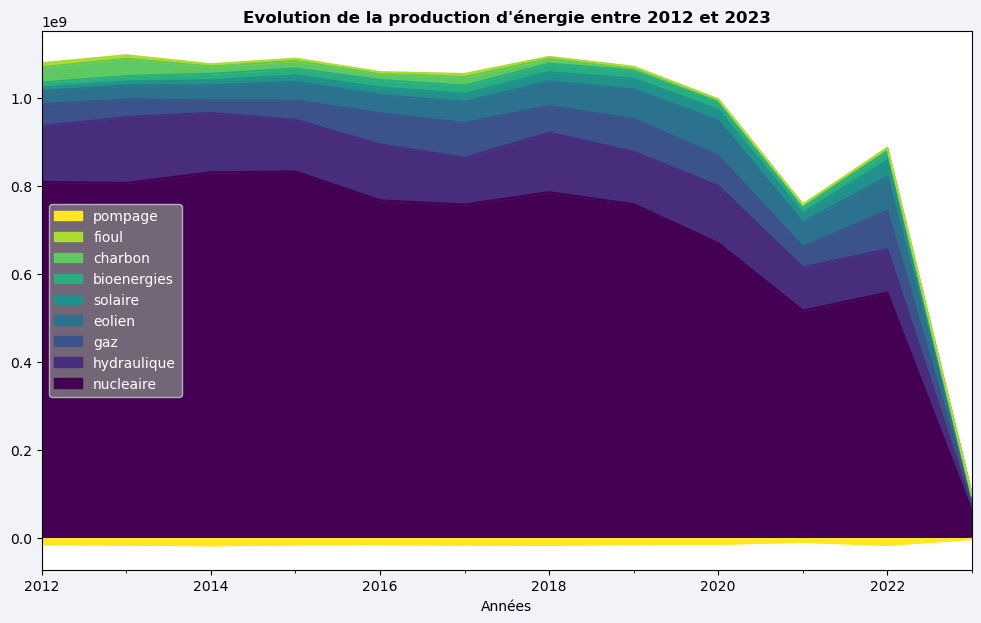

In [76]:
source_list = ["fioul", "charbon", "gaz", "nucleaire", "eolien",
                "solaire", "hydraulique", "pompage", "bioenergies"]

df_production = data_cons_df[source_list].resample("YE").sum()

# sort columns from the lowest to the highest source of energy production 
columns_sorted = df_production.sum().sort_values(ascending=False).index
df_production = df_production[columns_sorted]

df_production.plot(kind="area", colormap="viridis")

plt.xlabel("Années")
plt.title("Evolution de la production d'énergie entre 2012 et 2023", fontweight="bold")
plt.legend(reverse=True, labelcolor="w", frameon=True, facecolor="grey")

plt.show()

#### Rolling mean: